In [1]:
from yolo import YOLO, detect_video
from PIL import Image
import matplotlib.pyplot as plt
from yolo3.model import yolo_eval, yolo_body, tiny_yolo_body
from keras.layers import Input
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data
import tensorflow as tf
from keras.utils import multi_gpu_model
from keras.models import load_model

Using TensorFlow backend.
/home/myx/anaconda3/envs/cs231n/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
def detect_img(yolo):
    while True:
        img = input('Input image filename:')
        try:
            image = Image.open(img)
        except:
            print('Open Error! Try again!')
            continue
        else:
            plt.imshow(image)
            plt.show()
            r_image = yolo.detect_image(image)
            plt.imshow(r_image)
            plt.show()
            #r_image.show()
            
    yolo.close_session()

## Predict on trained voc tiny model
Train on 4510 samples, val on 501 samples, with batch size 32 for 50 epoches
Freeze the first 42 layers of total 44 layers.

Then, Unfreeze all of the layers.
Train on 4510 samples, val on 501 samples, with batch size 32 for 50 epoches
early stop on the 64th epoch


In [11]:
kwargs = {"model_path": 'model_data/trained_voc_tiny.h5',
        "anchors_path": 'model_data/tiny_yolo_anchors.txt',
        "classes_path": 'model_data/voc_classes.txt'}   # coco的数据集训练出来的模型 voc 不能直接使用 需要重新训练
#print (kwargs)
yolo=YOLO(kwargs)

model_data/trained_voc_tiny.h5 model, 6 anchors, and 20 classes loaded.


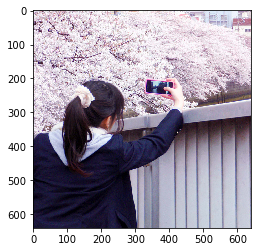

(416, 416, 3)
Found 1 boxes for img
person 0.55 (8, 206) (336, 635)
0.6033520512282848


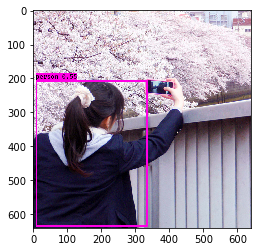

In [12]:
image_path = "model_data/coco/images/train2014/COCO_train2014_000000291825.jpg"
#image_path = "VCG41155153817.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()

## Predict on downloaded coco tiny model
As comparison， predit with downloaded coco tiny model

model_data/downloaded_coco_tiny.h5 model, 6 anchors, and 80 classes loaded.


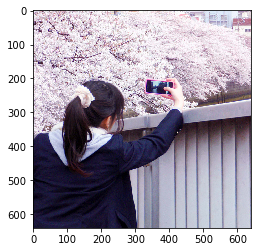

(416, 416, 3)
Found 1 boxes for img
person 0.52 (7, 213) (352, 630)
0.90904426202178


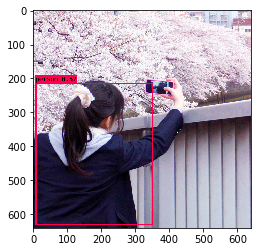

In [10]:
kwargs = {"model_path": 'model_data/downloaded_coco_tiny.h5',
        "anchors_path": 'model_data/tiny_yolo_anchors.txt',
        "classes_path": 'model_data/coco_classes.txt'}   # coco的数据集训练出来的模型 voc 不能直接使用 需要重新训练
#print (kwargs)
yolo=YOLO(kwargs)
image_path = "model_data/coco/images/train2014/COCO_train2014_000000291825.jpg"
#image_path = "VCG41155153817.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()

## Predit on normal downloaded model.

model_data/downloaded_coco.h5 model, 9 anchors, and 80 classes loaded.


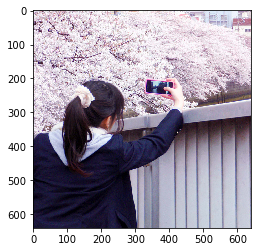

(416, 416, 3)
Found 2 boxes for img
cell phone 0.95 (329, 201) (414, 255)
person 1.00 (3, 196) (458, 630)
1.5475683510303497


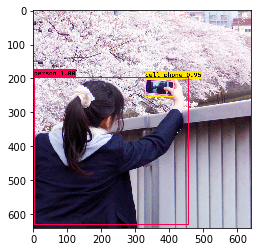

In [13]:
kwargs = {"model_path": 'model_data/downloaded_coco.h5',
        "anchors_path": 'model_data/yolo_anchors.txt',
        "classes_path": 'model_data/coco_classes.txt'}   # coco的数据集训练出来的模型 voc 不能直接使用 需要重新训练
#print (kwargs)
yolo=YOLO(kwargs)
image_path = "model_data/coco/images/train2014/COCO_train2014_000000291825.jpg"
#image_path = "VCG41155153817.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()

## Predit on trained voc model.
此部分用了三个例子来测试
第一个是voc 训练数据集里的图片，可以完整预测出来分类和boxes
第二个是voc 验证数据集内的图片, 只识别出了一个沙发，另一个识别的结果tvmonitor是错误的
第三个例子是未知的图片，完全识别不出来
因此可以判断，voc上的训练效果并不十分理想

model_data/trained_voc.h5 model, 9 anchors, and 20 classes loaded.


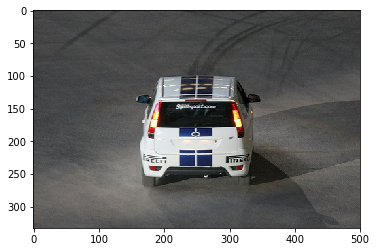

(416, 416, 3)
Found 1 boxes for img
car 1.00 (158, 101) (352, 265)
1.791490408591926


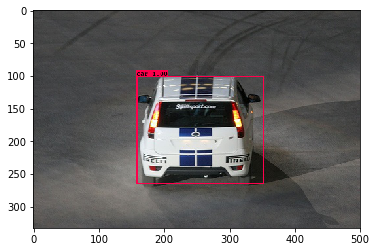

In [12]:
kwargs = {"model_path": 'model_data/trained_voc.h5',
        "anchors_path": 'model_data/yolo_anchors.txt',
        "classes_path": 'model_data/voc_classes.txt'}   # coco的数据集训练出来的模型 voc 不能直接使用 需要重新训练
#print (kwargs)
yolo=YOLO(kwargs)
image_path = "/home/myx/workspace/YOLO_Object_Localization_Keras/model_data/VOCdevkit/VOC2007/JPEGImages/000012.jpg"
#image_path = "VCG41155153817.jpg"
#image_path = "model_data/VOCdevkit/VOC2007/JPEGImages/000012.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()

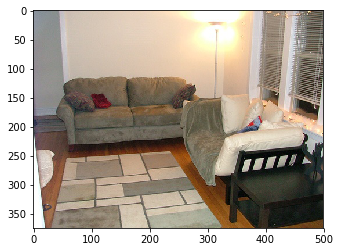

(416, 416, 3)
Found 2 boxes for img
tvmonitor 0.50 (37, 113) (296, 239)
sofa 1.00 (46, 109) (279, 230)
0.05270806048065424


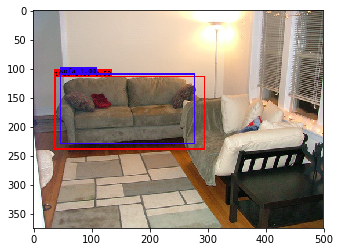

In [13]:
#image_path = "model_data/coco/images/train2014/COCO_train2014_000000291825.jpg"
image_path = "/home/myx/workspace/YOLO_Object_Localization_Keras/model_data/VOCdevkit/VOC2007/JPEGImages/009939.jpg"

image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()

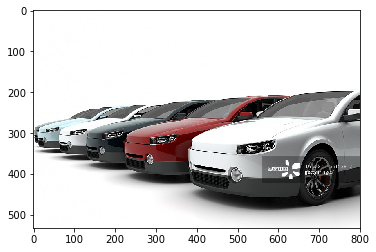

(416, 416, 3)
Found 0 boxes for img
0.054203156381845474


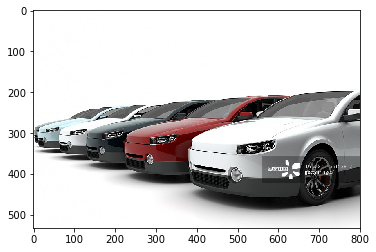

In [14]:
image_path = "VCG41155153817.jpg"
#image_path = "model_data/VOCdevkit/VOC2007/JPEGImages/000012.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()

# Predit on trained coco model.
Use download coco pretrained model weights.
Train on 73873 samples, val on 8208 samples, with batchsize 8 for 8 epoches, freeze all -3 layers.
Then unfreeze all of the layers. Trained 5 epoches.
随意找了一张图片，只预测出来其中一部分，没有官方训练的效果好，也就是说，训练后还不如没有训练的预训练权重预测的结果好
coco数据集中的图片，预测效果也是一般
如果想要更好的效果，估计还要多训练很长时间


model_data/trained_coco.h5 model, 9 anchors, and 80 classes loaded.


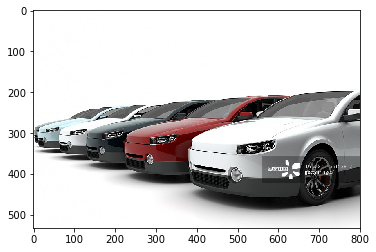

(416, 416, 3)
Found 2 boxes for img
truck 0.38 (233, 190) (800, 463)
car 0.49 (233, 190) (800, 463)
1.7607292756438255


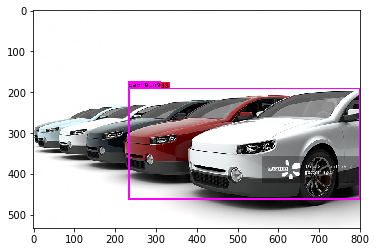

In [2]:
kwargs = {"model_path": 'model_data/trained_coco.h5',
        "anchors_path": 'model_data/yolo_anchors.txt',
        "classes_path": 'model_data/coco_classes.txt'}   # coco的数据集训练出来的模型 voc 不能直接使用 需要重新训练
#print (kwargs)
yolo=YOLO(kwargs)
#image_path = "/home/myx/workspace/YOLO_Object_Localization_Keras/model_data/VOCdevkit/VOC2007/JPEGImages/000012.jpg"
image_path = "VCG41155153817.jpg"
#image_path = "model_data/VOCdevkit/VOC2007/JPEGImages/000012.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()

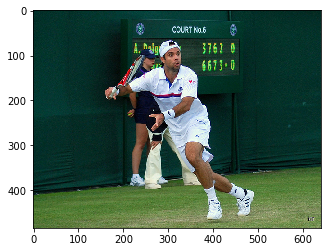

(416, 416, 3)
Found 1 boxes for img
person 0.99 (174, 59) (385, 433)
0.06264009792357683


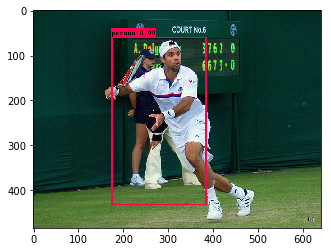

In [3]:
#image_path = "VCG41155153817.jpg"
image_path = "model_data/coco/images/train2014/COCO_train2014_000000193879.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.show()
r_image = yolo.detect_image(image)
plt.imshow(r_image)
plt.show()